# SCC-ICMC-USP - 1º Semestre de 2024
## SCC5948/MAI5024 - Ciência de Dados
### Professora: Roseli A. F. Romero
###  

### **Exercício 4**

**Número do Grupo:**

**Alunos:**
- Julyana Flores de Prá (NUSP: 15600911)
- Thiago Rafael Mariotti Claudio (NUSP: 15611674)

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.

---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---

Após a análise dos dados e um pré-processamento, segue a etapa de modelagem dos experimentos. Essa etapa pode exigir um retorno ao pré-processamento, caso seja percebido que algo precisa ser ajustado. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, o experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com a ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Esta prática foca mais no processo de avaliação e não no modelamento em si, por isso vamos trabalhar com apenas dois tipos de classificadores. Para a avaliação, é necessário definir qual a função de custo/erro adequada e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado à escolha do algoritmo de classificação, bem como à escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()
features, target = load_data.data, load_data.target

import pandas as pd

random_state_da_julyana = 13 # ela ordena eu só faço

df = pd.DataFrame(load_data.data, columns=load_data.feature_names)
df = df.assign(target=pd.Series(load_data.target))

display(df.head(5))
display(df.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


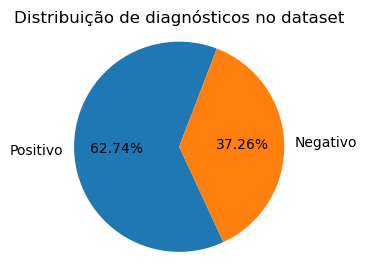

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.pie(df['target'].value_counts(), labels=["Positivo","Negativo"], autopct='%1.2f%%', startangle=69)
plt.title('Distribuição de diagnósticos no dataset')
plt.axis('equal')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

def preprocess(X_treino, X_teste):

    scaler = StandardScaler()

    print(f"Antes do escalonamento.\nX_treino.shape: {X_treino.shape}\nX_teste.shape: {X_teste.shape}")
    
    X_treino_escalonado = scaler.fit_transform(X_treino)
    X_teste_escalonado = scaler.transform(X_treino)

    print(f"Depois do escalonamento.\nX_treino_escalonado.shape: {X_treino_escalonado.shape}\nX_teste_escalonado.shape: {X_teste_escalonado.shape}")
    
    return X_treino_escalonado, X_teste_escalonado

---
### Questão 02.

Implemente a função que retorna a matriz de confusão, escolha duas métricas de avaliação e crie 2 funções, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [4]:
# Complete a função de cálculo da matriz de confusão.

## Eu assumi que era pra implementar do zero - Thiago
def confusion_matrix_(y_treino, y_predito):
    # Check if input arrays have the same shape
    if y_treino.shape != y_predito.shape:
        raise ValueError(f"y_treino e y_predito tem tamanhos diferentes.\ny_treino.shape {y_treino.shape} != y_predito.shape {y_predito.shape}")

    n_classes = len(set(y_treino))

    conf_matrix = np.zeros((n_classes, n_classes), dtype=int)

    for i in range(len(y_treino)):
        true_teste = y_treino[i]
        true_preduto = y_predito[i]
        conf_matrix[true_teste, true_preduto] += 1

    return conf_matrix

In [5]:
# Demonstra o funcionamento da função confusion_matrix.
actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

conf_mat = confusion_matrix_(actual, predicted)
display(conf_mat)

array([[1, 3],
       [2, 4]])

In [6]:
# Implementar as outras metricas pra facilitar

def acuracia(conf_mat):
    total = conf_mat.sum()
    correct = np.trace(conf_mat)
    return correct / total

def precisao(conf_mat, classe):
    TP = conf_mat[classe, classe]
    FP = conf_mat.sum(axis=0)[classe] - TP
    return TP / (TP + FP)

def recall(conf_mat, classe):
    TP = conf_mat[classe, classe]
    FN = conf_mat.sum(axis=1)[classe] - TP
    return TP / (TP + FN)

In [7]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 1.
def metric1_f1_score(conf_mat, classe):
    prec = precisao(conf_mat, classe)
    rec = recall(conf_mat, classe)
    return 2 * prec * rec / (prec + rec)

#Teste
m = metric1_f1_score(conf_mat,1)
print(m)

0.6153846153846153


In [8]:
# Mudar o nome e os parâmetros da função de acordo com sua métrica 2.
def metric2_especificidade(conf_mat, classe):
  TN = conf_mat.sum(axis=0)[classe] - conf_mat[classe, classe]
  FN = conf_mat.sum(axis=1)[classe] - conf_mat[classe, classe]
  return TN / (TN + FN)

# Teste
m = metric2_especificidade(conf_mat, 1)
print(m)

0.6


---
### Questão 03.

Complete e execute a função *classificacao* definida no notebook.

- Aplique validação cruzada
- Use sua função de pré-processamento
- Use suas métricas de avaliação

**ATENÇÃO:** utilizar o método ``sklearn.model_selection.KFold`` para realizar a amostragem solicitada. Prestem atenção nas dicas e complete o código onde foi solicitado.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np
from sklearn.metrics import confusion_matrix

def classificacao(data, columns, target, preproc_fn, score_fn, score_name, fn_conf_matrix, folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 2 modelos (knn, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    # inicializa os modelos com os parâmetros solicitados
    knn = KNeighborsClassifier(n_neighbors=3)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    
    clfs = [knn, dt]
    clfs_names = ['knn', 'dt']
    
    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    # DICA: Utilizar o método sklearn.model_selection.KFold
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state_da_julyana)
    
    # itera para cada classificador fazendo treino e teste
    results = {'knn':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        # para cada split
    
            # separa conjunto de treino e de teste
            # DICA: utilizar método straKFold.split() do objeto criado na preparação
            # da validação cruzada.
            for train_index, test_index in kf.split(data[columns]):
                # separa conjunto de treino e de teste

                
                x_train, x_test = data[columns].iloc[train_index], data[columns].iloc[test_index]
                y_train, y_test = data.loc[train_index, target], data.loc[train_index, target]

    
            # preprocessamento
            X_treino_escalonado, X_teste_escalonado = preproc_fn(x_train, x_test)
    
            # faz o treino do modelo
            clf = c.fit(X=X_treino_escalonado, y=y_train)
    
            # valores preditos pelo classificador
            y_pred = clf.predict(X_teste_escalonado)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
    
            # realiza predição no conjunto de teste e salva o resultado
            # DICA: Chamar a função de avaliação previamente produzida (score_fn).
            # A métrica calculada deve ser armazenada em "resultado"
            
            resultado = score_fn(confusion_matrix(y_test, y_pred), 1) # Calcular score pra 'Positivos'
            results[c_name].append(resultado)
            resultado = score_fn(confusion_matrix(y_test, y_pred), 0) # Calcular score pra 'Negativos'
            results[c_name].append(resultado)
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

---

### Questão 04.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 2 procedimentos acima para estimar o desempenho.

> **DICA:** Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

In [10]:
cols_feat = list(df.columns[:30])
print(cols_feat)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


10-fold Cross-Validation:
Antes do escalonamento.
X_treino.shape: (513, 30)
X_teste.shape: (56, 30)
Depois do escalonamento.
X_treino_escalonado.shape: (513, 30)
X_teste_escalonado.shape: (513, 30)
Antes do escalonamento.
X_treino.shape: (513, 30)
X_teste.shape: (56, 30)
Depois do escalonamento.
X_treino_escalonado.shape: (513, 30)
X_teste_escalonado.shape: (513, 30)


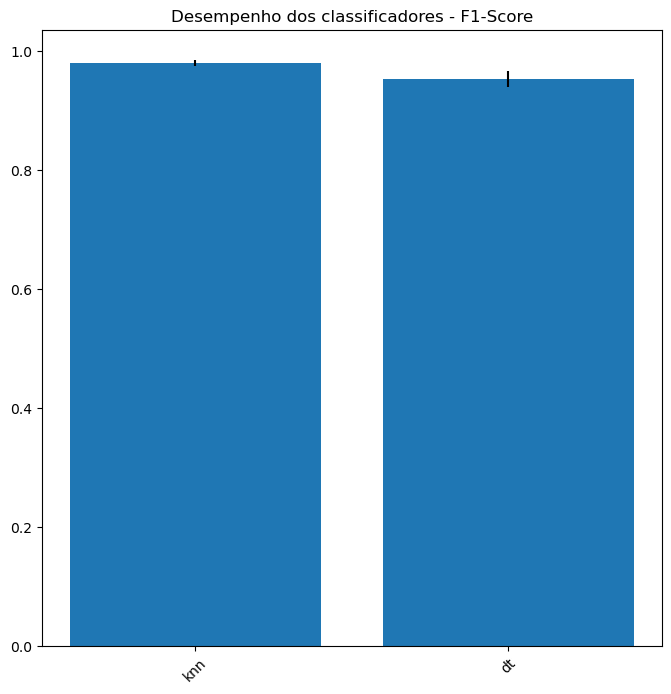

{'results': {'knn': [0.9861751152073733, 0.976], 'dt': [0.9667673716012085, 0.9395604395604397]}, 'clfs': [KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(min_samples_split=56)]}
Leave-One-Out Cross-Validation:
Antes do escalonamento.
X_treino.shape: (568, 30)
X_teste.shape: (1, 30)
Depois do escalonamento.
X_treino_escalonado.shape: (568, 30)
X_teste_escalonado.shape: (568, 30)
Antes do escalonamento.
X_treino.shape: (568, 30)
X_teste.shape: (1, 30)
Depois do escalonamento.
X_treino_escalonado.shape: (568, 30)
X_teste_escalonado.shape: (568, 30)


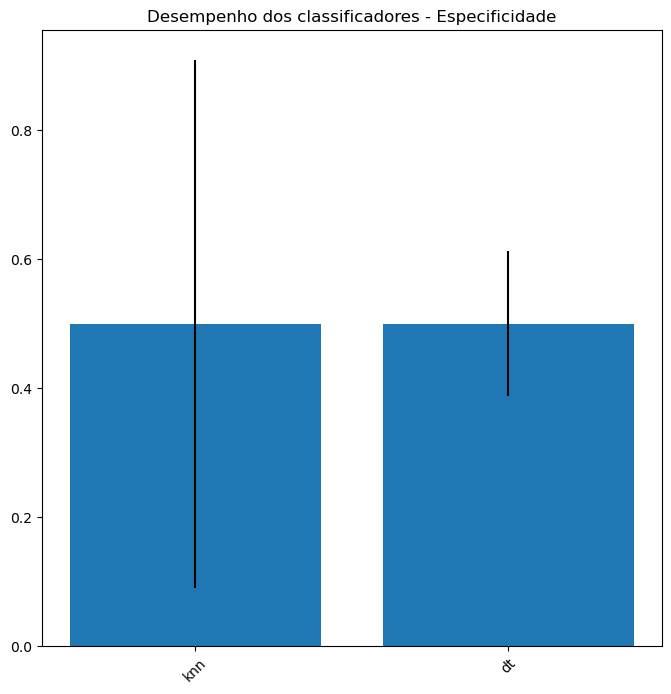

{'results': {'knn': [0.9090909090909091, 0.09090909090909091], 'dt': [0.3870967741935484, 0.6129032258064516]}, 'clfs': [KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(min_samples_split=56)]}


In [18]:
print("10-fold Cross-Validation:")
print(classificacao(data=df, columns=cols_feat, target='target', preproc_fn=preprocess, score_fn=metric1_f1_score, score_name="F1-Score",fn_conf_matrix=confusion_matrix_, folds=10, plot=True))

print("Leave-One-Out Cross-Validation:")
print(classificacao(data=df, columns=cols_feat, target='target', preproc_fn=preprocess, score_fn=metric2_especificidade, score_name="Especificidade", fn_conf_matrix=confusion_matrix_, folds=len(df), plot=True))